In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
%matplotlib inline

# Parameters of the dataset

In [2]:
my_dataset= pd.read_csv('hw1_dataset.csv') #read the dataset
m = len(my_dataset.index) #get the dataset number of rows
col = len(my_dataset.columns)
combination = 1
input_size = col - combination

# Logistic Regression Function

In [3]:
def combination_fn (input_size,combination):
    #input_size = col - combination -1
    folds = 5 #how many folds
    shuffle = 5 #times of shuffling 
    k = m/folds #dividing by the folds
    K = int (k) #number of rows for each fold
    input_size
        #create 5 copies for shuffling the testing sets around the folds
    d = np.zeros((K,col,shuffle))
    accuracy_list = []
    cross_list = []
    cross_validation = []

    for i in range (shuffle):
        for j in range (folds): #0 1 2 3 4
            d[:,:,j] = my_dataset.iloc[(K*(j)):(K*(j+1))]
        Training_Set = np.concatenate([d[:,:,(i%shuffle)], d[:,:,((i+1)%shuffle)], d[:,:,((i+2)%shuffle)]])
        #form 3 folds as training sets
        Validation_Set = d[:,:,((i+3)%shuffle)] #form 1 folds as validation sets
        Testing_Set = d[:,:,((i+4)%shuffle)] #form 3 folds as testing sets

        c = np.zeros(input_size) #initial weights theta0
        a = 0.0001 #learning rate alpha
        training_set = pd.DataFrame(Training_Set) #change the training set from array to data frame format
        validation_set = pd.DataFrame(Validation_Set) #change the validation set from array to data frame format
        testing_set = pd.DataFrame(Testing_Set) #change the testing set from array to data frame format
        x_tr = training_set.iloc[:,0:input_size] #extracting all the inputs x from the training set
        y_tr = training_set.iloc[:,col - 1] #extracting all the outputs y from the training set
        x_v = validation_set.iloc[:,0:input_size] #extracting all the inputs x from the validation set
        y_v = validation_set.iloc[:,col - 1] #extracting all the outputs y from the validation set
        x_ts = testing_set.iloc[:,0:input_size] #extracting all the inputs x from the testing set
        y_ts = testing_set.iloc[:,col - 1] #extracting all the outputs y from the testing set

        J_c_tr = 0 #training set cost function
        J_c_v = 0 #validation set cost function
        r = 0 #counter of error of validation set
        itr = 100 #number of iterations

        list_of_100 = []
        list_of_cross = []
        list_of_validation = []

        for z in range (itr):
            for j in range (input_size):
                hc_x_tr = 1/(1 + (np.exp(-np.dot(x_tr,c.T)))) #hc of x (predicted output) for training fold
                c[j] = c[j]+((a/m)*np.sum((y_tr-hc_x_tr)*x_tr.iloc[:,j])) #weight update of thetaj
            J_c_tr = ((-y_tr * np.log(hc_x_tr))-((1-y_tr)* np.log(1-hc_x_tr))).mean()
            #cost function of the training set       
            hc_x_v = 1/(1 + (np.exp(-np.dot(x_v,c.T)))) #hc of x for validation fold by using updated theta c
            J_c_vp = J_c_v #store the previous value of the cost function of the validation set
            J_c_v = ((-y_v * np.log(hc_x_v))-((1-y_v)* np.log(1-hc_x_v))).mean() #cost function validation set

            if J_c_v > J_c_vp:
                r += 1 #icrement the counter value if the current error > previous error
                if r > 10:
                    break #stop training when the counter reaches 10
            else:
                r = 0 #to enforce counting the conscutive increments only 


            hc_x_ts = 1/(1 + (np.exp(-np.dot(x_ts,c.T))))#predicted output hc of the testing fold
            hc_x_ts = np.round(hc_x_ts, 0)


            hc_x_ts = hc_x_ts.astype(int)
            y_ts = y_ts.astype(int)

            r_counter = 0

            for n in range(60):
                if hc_x_ts[n] != y_ts[n]:
                    r_counter += 1
            r_counter        
            accuracy = (K - r_counter) * 100 / K

            list_of_cross.append(np.round(J_c_tr,2))
            list_of_validation.append(np.round(J_c_v,2))
            list_of_100.append(np.round(accuracy,2))

        accuracy_list.append(list_of_100)
        cross_list.append(list_of_cross)
        cross_validation.append(list_of_validation)
    
    #plotting the accuracy
    
    iteration = np.arange(1, 101)
    fig, axs = plt.subplots(5, 1)
    x = iteration
    y = accuracy_list[0]
    axs[0].plot(x, y, 'tab:purple', label = "Testing fold 5")
    axs[0].set_title('shuffle 1')
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    y = accuracy_list[1]
    axs[1].plot(x, y, 'tab:red', label = "Testing fold 1")
    axs[1].set_title('shuffle 2')
    axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    y = accuracy_list[2]
    axs[2].plot(x, y, 'tab:orange', label = "Testing fold 2")
    axs[2].set_title('shuffle 3')
    axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    y = accuracy_list[3]
    axs[3].plot(x, y, 'tab:green', label = "Testing fold 3")
    axs[3].set_title('shuffle 4')
    axs[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    y = accuracy_list[4]
    axs[4].plot(x, y, 'tab:blue', label = "Testing fold 4")
    axs[4].set_title('shuffle 5')
    axs[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    for ax in axs.flat:
        ax.set(xlabel='Iteration', ylabel='Accuracy')

    for ax in axs.flat:
        ax.label_outer()
    
    #plotting the cross entropy
    
    fig, axs = plt.subplots(5, 1)
    x = iteration
    y = cross_list[0]
    axs[0].plot(x, y, 'tab:blue', label = "Training")
    y = cross_validation[0]
    axs[0].plot(x, y, 'tab:red', label = "Validation")
    axs[0].set_title('shuffle 1')
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    y = cross_list[1]
    axs[1].plot(x, y, 'tab:blue')
    y = cross_validation[1]
    axs[1].plot(x, y, 'tab:red')
    axs[1].set_title('shuffle 2')
    y = cross_list[2]
    axs[2].plot(x, y, 'tab:blue')
    y = cross_validation[2]
    axs[2].plot(x, y, 'tab:red')
    axs[2].set_title('shuffle 3')
    y = cross_list[3]
    axs[3].plot(x, y, 'tab:blue')
    y = cross_validation[3]
    axs[3].plot(x, y, 'tab:red')
    axs[3].set_title('shuffle 4')
    y = cross_list[4]
    axs[4].plot(x, y, 'tab:blue')
    y = cross_validation[4]
    axs[4].plot(x, y, 'tab:red')
    axs[4].set_title('shuffle 5')

    for ax in axs.flat:
        ax.set(xlabel='Iteration', ylabel='Entropy')

    for ax in axs.flat:
        ax.label_outer()
    return combination

# 1st Combination

Combination Number:


1

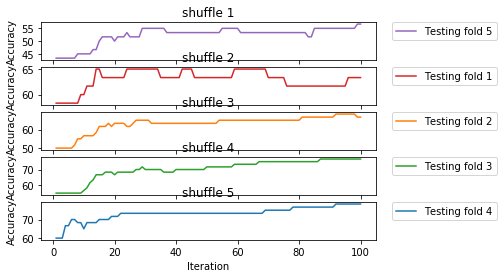

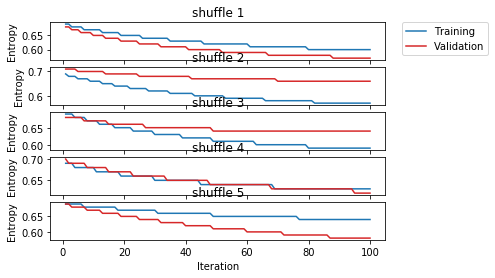

In [4]:
print("Combination Number:")
# x1, x2, x3, .... x13
combination_1 = combination_fn (input_size,combination)
combination_1

# 2nd Combination

Combination Number:


2

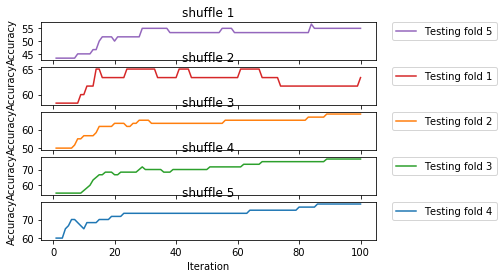

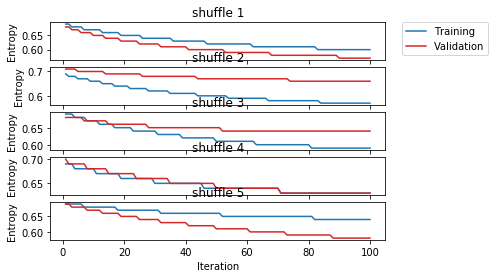

In [5]:
print("Combination Number:")
combination = 2
# x1, x2, x3, .... x12
input_size = col - combination
combination_2 = combination_fn (input_size,combination)
combination_2

# 3rd Combination

Combination Number:


3

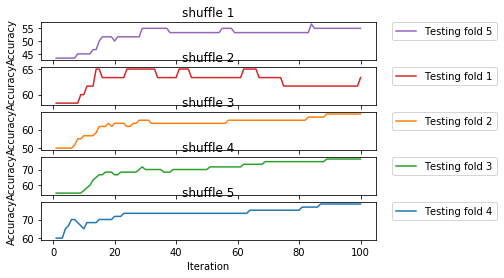

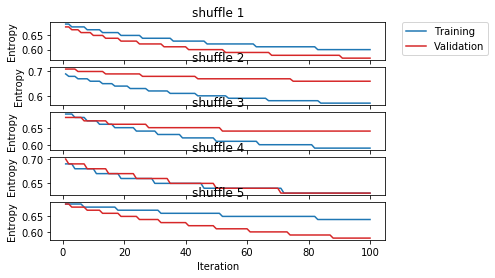

In [6]:
print("Combination Number:")
combination = 3
# x1, x2, x3, .... x11
input_size = col - combination
combination_3 = combination_fn (input_size,combination)
combination_3